**CRIB SHEET RULES OF THE ROAD:**

This crib sheet is provided to support access, utilization, and plotting of UCalgary optical datasets. It is intended as a base set of code that a user may edit and manipulate to serve their own needs.  Crib sheets contains UCalgary verified and validated procedures for plotting and manipulating UCalgary ASI data for common use cases.  Use of this crib sheet does not require acknowledgment, it is freely distributed for scientific use. Please also remember to perform due diligence on all data use.  We recommend comparison with verified data products on [data.phys.ucalgary.ca](https://data.phys.ucalgary.ca) to ensure that any user output does not contradict operational summary plots.  Data use must be acknowledged according to the information available for each data set - please see [data.phys.ucalgary.ca](https://data.phys.ucalgary.ca).  If you encounter any issues with the data or the crib sheet, please contact the UCalgary team for support (Emma Spanswick, elspansw@ucalgary.ca). Copyright © University of Calgary.

---
# **TREx Auroral Transport Model**
---

TODO: XXXXX Summary about what ATM is.

### **Crib Sheet Summary**
Below is an example of using PyAuroraX to perform a TREx Auroral Transport Model (ATM) forward and inverse calculations.


</br>

---

</br>



## **Install dependencies**

Here we'll install [PyAuroraX](https://github.com/aurorax-space/pyaurorax), and import it.

Some helpful links:
  - [PyAuroraX documentation](https://docs.aurorax.space/code/overview)
  - [PyAuroraX API Reference](https://docs.aurorax.space/code/pyaurorax_api_reference/pyaurorax)
  - [Jupyter notebook examples](https://github.com/aurorax-space/pyaurorax/tree/main/examples/notebooks)

In [ ]:
# install pyaurorax
!pip install pyaurorax

In [13]:
import datetime
import pprint
import numpy as np
import matplotlib.pyplot as plt
import pyaurorax

aurorax = pyaurorax.PyAuroraX()

## **Forward Calculations**

### **Perform a basic 'forward' calculation**

First will show how to do a basic request, and plot the results. Later on, we'll show how to do a request by supplying a custom spectrum.

Requests take a series of input parameters. Some parameters are required, and some are optional with default values that will be set if they are not supplied. The following request we'll be performing utilizes all default values for the optional parameter (marked as such with a comment on that line).

More details on inputs and outputs [in the `forward()` function documentation](https://docs.aurorax.space/code/pyaurorax_api_reference/pyaurorax/models/atm/index.html#pyaurorax.models.atm.ATMManager.forward).

<small>
Input notes:

- latitude and longitude are to be in geodetic coordinates (-90 to 90 lat, -180 to 180 lon)
- maxwellian_characteristic_energy must be specified if the maxwellian_energy_flux is not 0
- gaussian_peak_energy must be specified if the gaussian_energy_flux is not 0
- gaussian_spectral_width must be specified if the gaussian_energy_flux is not 0
- valid values for nrlmsis_model_version are '00' and '2.0'
- units
  - timescale parameters: seconds
  - maxwellian energy flux: erg/cm2/s
  - maxwellian characteristic energy: eV
  - gaussian energy flux: erg/cm2/s
  - gaussian peak energy: eV
  - gaussian spectral width: eV
  - custom spectrum
    - energy in eV, flux in 1/cm2/sr/eV
    - energy and flux arrays must be the same length
</small>

<small>
Output notes:

- output parameter of the request are toggles the enable/disable each field's inclusion in the response
- all output parameters are false by default
- altitude is in kilometers
- emission data: 1-D array -- volume emission rate (1/cm^3/s)
- plasma electron density: 1-D array -- density (cm^-3)
- plasma O2+ density: 1-D array -- density (cm^-3)
- plasma NO+ density: 1-D array -- density (cm^-3)
- plasma O+ density: 1-D array -- density (cm^-3)
- plasma ionisation rate: 1-D array -- ionisation rate (1/cm^3/s)
- plasma electron temperature: 1-D array -- temperature (K)
- plasma ion temperature: 1-D array -- temperature (K)
- plasma peterson conductivity: 1-D array -- conductivity (S/m)
- plasma hall conductivity: 1-D array -- conductivity (S/m)
- neutral O2 density: 1-D array -- density (cm^-3)
- neutral O density: 1-D array -- density (cm^-3)
- neutral N2 density: 1-D array -- density (cm^-3)
- neutral N density: 1-D array -- density (cm^-3)
- neutral temperature: 1-D array -- temperature (K)
</small>

ATM requests work in a way where you toggle ON whatever outputs you want back. This allows you to get back only what you want. This mechanism is controlled by the `ATMForwardOutputFlags()` class that must be instantiated before making an ATM calculation.

As part of this class, there are helper functions that toggle ON or OFF all outputs, and toggle on common groups.

In [3]:
# set up our request
#
# all output parameters are default to False. Here we initialize 
# the output flags we want to get
output = pyaurorax.models.ATMForwardOutputFlags()  # initialize output flags, all will be False by default
output.enable_only_height_integrated_rayleighs()   # enable all height-integrated Rayleighs values
output.altitudes = True                            # enable altitudes
output.emission_5577 = True                        # enable the 5577nm emission

# set the location (Calgary-ish)
#
# NOTE: ATM forward calculations can be performed 
# for any latitude or longitude
latitude = 51.04
longitude = -114.5

# set the timestamp to UT06 of the previous day
#
# NOTE: ATM forward calculations can be performed for any date up 
# to the end of the previous day. It is expected to be in UTC time, 
# and any timezone data will be ignored. 
timestamp = datetime.datetime.now().replace(hour=6, minute=0, second=0, microsecond=0) - datetime.timedelta(days=1)

In [6]:
# perform the calculation
result = aurorax.models.atm.forward(timestamp, latitude, longitude, output)

# view the output
# 
# we use handy print method for the results
result.pretty_print()

ATMForwardResult:
  altitudes                            : array([ 80. ,  81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ...])
  emission_1304                        : None
  emission_1356                        : None
  emission_4278                        : None
  emission_5577                        : array([9.72542875e-06, 4.63875076e-05, 4.47856582e-04, 4.463 ...])
  emission_6300                        : None
  emission_8446                        : None
  emission_lbh                         : None
  height_integrated_rayleighs_1304     : 1283.141350
  height_integrated_rayleighs_1356     : 218.736472
  height_integrated_rayleighs_4278     : 2765.693660
  height_integrated_rayleighs_5577     : 16642.590201
  height_integrated_rayleighs_6300     : 379.060374
  height_integrated_rayleighs_8446     : 476.980016
  height_integrated_rayleighs_lbh      : 15218.480492
  neutral_n2_density                   : None
  neutral_n_density                    : None
  neutral_o2_density        

Let's have a closer look at some of the results.

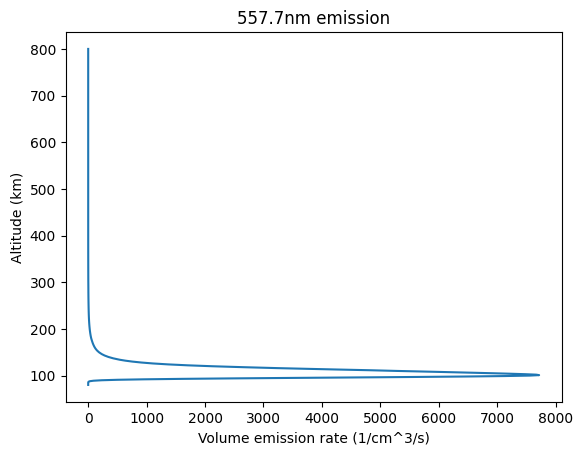

In [12]:
# plot the 557.7nm emission data
plt.title("557.7nm emission")
plt.xlabel("Volume emission rate (1/cm^3/s)")
plt.ylabel("Altitude (km)")
plt.plot(result.emission_5577, result.altitudes)
plt.show()

### **Perform a request by supplying a custom spectrum**

You can also perform requests by supplying a custom spectrum. Below, we'll do this using some example spectrum data. Note that the energy and flux arrays must be the same length, and energy and flux values are to be floats in eV and 1/cm2/sr/eV, respectively.

In [14]:
# two arrays that we'll merge into a Nx2 numpy array, representing energy and flux.
custom_spectrum_energy = [
    1.25000, 1.75000, 2.25000, 2.75000, 3.25000, 3.75000, 4.25000, 4.75000, 5.25000, 5.75000, 6.25000, 6.75000, 7.25000, 7.75000,
    8.25000, 8.75000, 9.25000, 9.75000, 10.2500, 10.7616, 11.3058, 11.8854, 12.4948, 13.1354, 13.8089, 14.5169, 15.2612, 16.0436,
    16.8662, 17.7310, 18.6401, 19.5957, 20.6004, 21.6566, 22.7670, 23.9343, 25.1614, 26.4515, 27.8077, 29.2334, 30.7322, 32.3079,
    33.9644, 35.7058, 37.5365, 39.4610, 41.4842, 43.6111, 45.8471, 48.1978, 50.6689, 53.2668, 55.9978, 58.8689, 61.8871, 65.0602,
    68.3959, 71.9026, 75.5891, 79.4647, 83.5389, 87.8221, 92.3248, 97.0584, 102.035, 107.266, 112.766, 118.547, 124.625, 131.015,
    137.732, 144.794, 152.218, 160.022, 168.227, 176.852, 185.919, 195.452, 205.473, 216.007, 227.082, 238.725, 250.965, 263.832,
    277.359, 291.579, 306.529, 322.245, 338.767, 356.136, 374.395, 393.591, 413.771, 434.985, 457.288, 480.733, 505.381, 531.292,
    558.532, 587.169, 617.274, 648.922, 682.193, 717.170, 753.940, 792.595, 833.232, 875.953, 920.864, 968.078, 1017.71, 1069.89,
    1124.75, 1182.41, 1243.04, 1306.77, 1373.77, 1444.20, 1518.25, 1596.09, 1677.92, 1763.95, 1854.39, 1949.47, 2049.42, 2154.50,
    2264.96, 2381.09, 2503.17, 2631.51, 2766.43, 2908.27, 3057.38, 3214.13, 3378.93, 3552.17, 3734.29, 3925.75, 4127.03, 4338.63,
    4561.07, 4794.92, 5040.76, 5299.21, 5570.91, 5856.53, 6156.80, 6472.47, 6804.32, 7153.18, 7519.93, 7905.49, 8310.81, 8736.92,
    9184.87, 9655.7
]
custom_spectrum_flux = [
    14237.8, 19932.9, 25628.1, 31323.2, 37018.3, 42713.4, 48408.6, 54103.7, 59798.8, 65493.9, 71189.1, 76884.2, 82579.3, 88274.4,
    93969.6, 99664.7, 105360.0, 111055.0, 116750.0, 122577.0, 128775.0, 135378.0, 142319.0, 149616.0, 157287.0, 165351.0, 173829.0,
    182741.0, 192110.0, 201960.0, 212315.0, 223200.0, 234644.0, 246675.0, 259322.0, 272618.0, 286595.0, 301289.0, 316737.0, 332976.0,
    350048.0, 367995.0, 386863.0, 406698.0, 427550.0, 449471.0, 472515.0, 496742.0, 522210.0, 548985.0, 577132.0, 606722.0, 637829.0,
    670531.0, 704910.0, 741052.0, 779046.0, 818989.0, 860979.0, 905122.0, 951529.0, 1.00032e+06, 1.05160e+06, 1.10552e+06,
    1.14681e+06, 1.16681e+06, 1.18332e+06, 1.19597e+06, 1.20452e+06, 1.21134e+06, 1.21518e+06, 1.21786e+06, 1.21958e+06, 1.22031e+06,
    1.21912e+06, 1.21596e+06, 1.21029e+06, 1.20159e+06, 1.18984e+06, 1.17542e+06, 1.15883e+06, 1.14056e+06, 1.12111e+06, 1.10084e+06,
    1.07960e+06, 1.05717e+06, 1.03333e+06, 1.00787e+06, 980597.0, 951507.0, 920731.0, 888359.0, 854453.0, 819049.0, 782220.0,
    744214.0, 705369.0, 665934.0, 626276.0, 586707.0, 547469.0, 508787.0, 470923.0, 434073.0, 398475.0, 364314.0, 331712.0, 300753.0,
    271519.0, 244145.0, 218704.0, 195202.0, 173623.0, 153886.0, 135967.0, 119819.0, 105375.0, 92493.0, 81018.5, 70809.4, 61716.9,
    53608.8, 46394.7, 40017.3, 34425.8, 29569.1, 25398.0, 21855.1, 18852.0, 16295.5, 14096.6, 12167.9, 10429.6, 8852.41, 7439.90,
    6196.57, 5126.73, 4235.10, 3517.08, 2944.53, 2486.98, 2115.25, 1801.38, 1520.12, 1263.38, 1033.71, 833.682, 665.821, 532.604,
    433.682, 362.035, 310.022, 270.400, 236.311, 201.652, 165.385
]
custom_spectrum_arr = np.empty((len(custom_spectrum_energy), 2), dtype=np.float64)
custom_spectrum_arr[:, 0] = np.asarray(custom_spectrum_energy)[:]
custom_spectrum_arr[:, 1] = np.asarray(custom_spectrum_flux)[:]

In [19]:
# set parameters
timestamp = datetime.datetime(2021, 11, 4, 6, 0, 0)
latitude = 58.227808
longitude = -103.680631

# set output
output = pyaurorax.models.ATMForwardOutputFlags()
output.altitudes = True
output.plasma_electron_density = True

# perform the calculation
result = aurorax.models.atm.forward(timestamp, latitude, longitude, output)

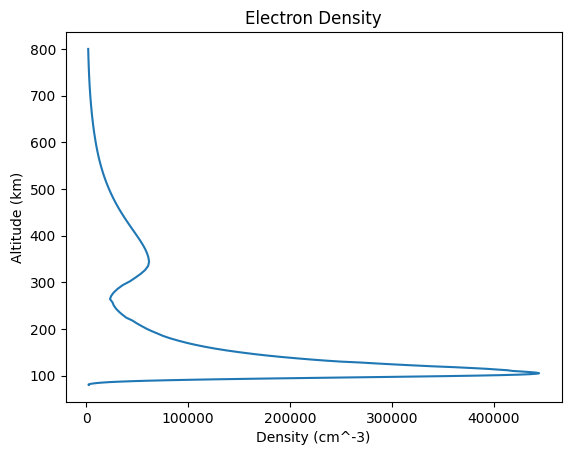

In [20]:
# plot the electron density data
plt.title("Electron Density")
plt.xlabel("Density (cm^-3)")
plt.ylabel("Altitude (km)")
plt.plot(result.plasma_electron_density, result.altitudes)
plt.show()

### **Do a request with all output parameters**

You can also do a request and specify the output flags to return everything that the ATM 'forward' endpoint has to offer. Below, we're going to do that and plot all data.

In [24]:
timestamp = datetime.datetime(2021, 11, 4, 6, 0, 0)
latitude = 58.227808
longitude = -103.680631

output = pyaurorax.models.ATMForwardOutputFlags()
output.set_all_true()

result = aurorax.models.atm.forward(timestamp, latitude, longitude, output)

result.pretty_print()

ATMForwardResult:
  altitudes                            : array([ 80. ,  81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ...])
  emission_1304                        : array([4.11610381e-06, 8.14978193e-06, 8.05713353e-05, 6.028 ...])
  emission_1356                        : array([6.52554263e-07, 1.36533311e-06, 1.35077644e-05, 1.010 ...])
  emission_4278                        : array([3.60688828e-02, 2.65546776e-02, 9.94128808e-02, 2.800 ...])
  emission_5577                        : array([1.80875533e-04, 1.10980112e-03, 1.33010345e-02, 1.544 ...])
  emission_6300                        : array([4.59703074e-07, 4.37639130e-07, 1.82654117e-06, 6.446 ...])
  emission_8446                        : array([1.50578364e-06, 3.01059140e-06, 2.97776405e-05, 2.228 ...])
  emission_lbh                         : array([1.90615952e-01, 1.61396325e-01, 6.04281723e-01, 1.702 ...])
  height_integrated_rayleighs_1304     : 1351.555528
  height_integrated_rayleighs_1356     : 230.423250
  height_inte

Height-integrated Rayleighs:
  427.8nm:  2501.37 R
  557.7nm:  15461.35 R
  630.0nm:  252.66 R
  844.6nm:  501.97 R
  LBH:      15266.78 R
  130.4nm:  1351.56 R
  135.6nm:  230.42 R


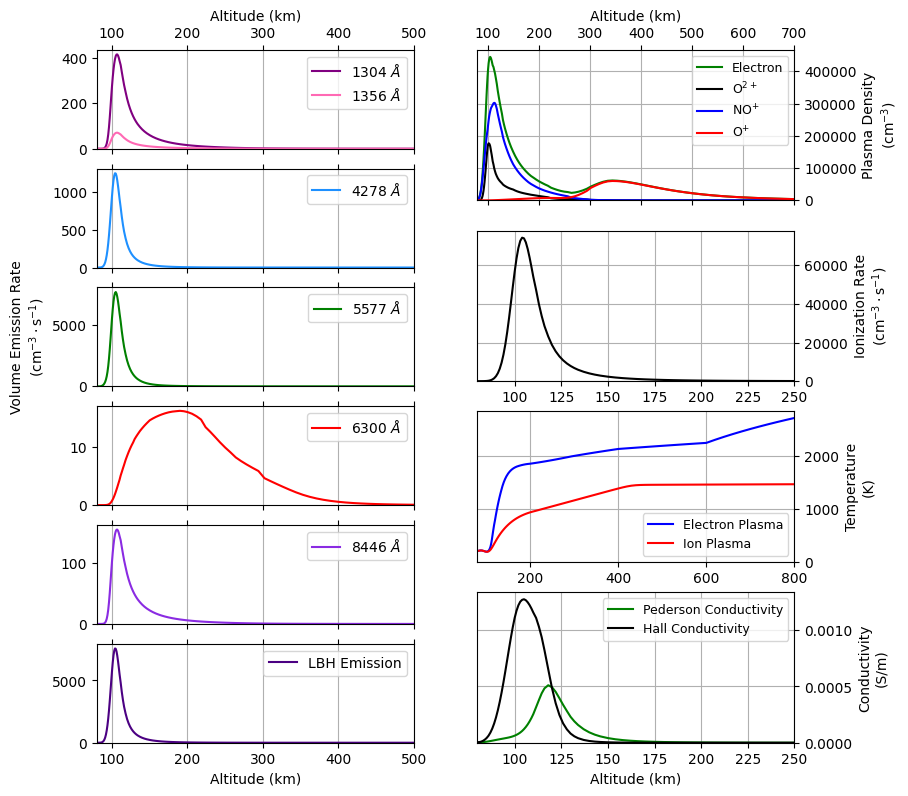

In [25]:
# let's show everything we got back
#
# print all height-integrated Rayleighs data
print("""Height-integrated Rayleighs:
  427.8nm:  %.02f R
  557.7nm:  %.02f R
  630.0nm:  %.02f R
  844.6nm:  %.02f R
  LBH:      %.02f R
  130.4nm:  %.02f R
  135.6nm:  %.02f R""" % (result.height_integrated_rayleighs_4278,
                          result.height_integrated_rayleighs_5577,
                          result.height_integrated_rayleighs_6300,
                          result.height_integrated_rayleighs_8446,
                          result.height_integrated_rayleighs_lbh,
                          result.height_integrated_rayleighs_1304,
                          result.height_integrated_rayleighs_1356))

# plot the emission, plasma, and neutral data
#
# we'll do this all in one plot, but made up from many subplots
alt = result.altitudes
fig = plt.figure(figsize=(9,9))

# plot all the emissions as a column of subplots
# 
# 1304 A & 1356 A emission
ax1 = fig.add_subplot(6,2,1)
ax1.plot(alt, result.emission_1304, label=r"1304 $\AA$", color="purple")
ax1.plot(alt, result.emission_1356, label=r"1356 $\AA$", color="hotpink")
ax1.legend()
ax1.set_xlim(80,500)
ax1.set_ylim(bottom=0)
ax1.grid(axis="x")
ax1.set_xlabel("Altitude (km)", va="bottom")
ax1.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax1.xaxis.set_label_position("top")

# blueline emission
ax2 = fig.add_subplot(6,2,3)
ax2.plot(alt, result.emission_4278, label=r"4278 $\AA$", color="dodgerblue")
ax2.legend()
ax2.set_xlim(80,500)
ax2.set_ylim(bottom=0)
ax2.grid(axis="x")
ax2.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# greenline emission
ax3 = fig.add_subplot(6,2,5)
ax3.plot(alt, result.emission_5577, label=r"5577 $\AA$", color="green")
ax3.legend()
ax3.set_xlim(80,500)
ax3.set_ylim(bottom=0)
ax3.grid(axis="x")
ax3.set_ylabel("Volume Emission Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax3.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# redline emission
ax4 = fig.add_subplot(6,2,7)
ax4.plot(alt, result.emission_6300, label=r"6300 $\AA$", color="red")
ax4.legend()
ax4.set_xlim(80,500)
ax4.set_ylim(bottom=0)
ax4.grid(axis="x")
ax4.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# near-infrared 8446 A emission
ax5 = fig.add_subplot(6,2,9)
ax5.plot(alt, result.emission_8446, label=r"8446 $\AA$", color="blueviolet")
ax5.legend()
ax5.set_xlim(80,500)
ax5.set_ylim(bottom=0)
ax5.grid(axis="x")
ax5.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# Lyman-Birge-Hopfield emission
ax6 = fig.add_subplot(6,2,11)
ax6.plot(alt, result.emission_lbh, label="LBH Emission", color="indigo")
ax6.legend()
ax6.set_xlim(80,500)
ax6.set_ylim(bottom=0)
ax6.grid(axis="x")
ax6.set_xlabel("Altitude (km)")
ax6.tick_params(axis="x", bottom=True, top=True)

# plot the plasma data as a second column of subplots
#
# plasma density
ax7 = fig.add_subplot(4,2,2)
ax7.plot(alt, result.plasma_electron_density, label="Electron", color="green")
ax7.plot(alt, result.plasma_o2plus_density, label="O$^{2+}$", color="black")
ax7.plot(alt, result.plasma_noplus_density, label="NO$^{+}$", color="blue")
ax7.plot(alt, result.plasma_oplus_density, label="O$^{+}$", color="red")
ax7.grid()
ax7.set_ylabel("Plasma Density\n(cm$^{-3}$)")
ax7.legend(fontsize=9)
ax7.set_xlim(80,700)
ax7.set_ylim(bottom=0)
ax7.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax7.set_xlabel("Altitude (km)")
ax7.xaxis.set_label_position("top")
ax7.yaxis.set_label_position("right")
ax7.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma ionisation rate
ax8 = fig.add_subplot(4,2,4)
ax8.plot(alt, result.plasma_ionisation_rate, color="black")
ax8.grid()
ax8.set_ylabel("Ionization Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax8.set_xlim(80,250)
ax8.set_ylim(bottom=0)
ax8.yaxis.set_label_position("right")
ax8.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma temperatures
ax9 = fig.add_subplot(4,2,6)
ax9.plot(alt, result.plasma_electron_temperature, label="Electron Plasma", color="blue")
ax9.plot(alt, result.plasma_ion_temperature, label="Ion Plasma", color="red")
ax9.grid()
ax9.legend(fontsize=9)
ax9.set_ylabel("Temperature\n(K)")
ax9.set_xlim(80,800)
ax9.set_ylim(bottom=0)
ax9.yaxis.set_label_position("right")
ax9.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma conductivities
ax10 = fig.add_subplot(4,2,8)
ax10.plot(alt, result.plasma_pederson_conductivity, label="Pederson Conductivity", color="green")
ax10.plot(alt, result.plasma_hall_conductivity, label="Hall Conductivity", color="black")
ax10.grid()
ax10.legend(fontsize=9)
ax10.set_ylabel("Conductivity\n(S/m)")
ax10.set_xlim(80,250)
ax10.set_ylim(bottom=0)
ax10.set_xlabel("Altitude (km)")
ax10.yaxis.set_label_position("right")
ax10.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# render the plot
plt.show()

---

## **Inversion Calculations**

### **Perform a basic 'inverse' calculation**

Using ATM you can also perform inversion calculations to derive various outputs using emission intensities as inputs.

This function works very similarly to the 'forward' function, where-by some inputs are required, some are optional, and outputs are enabled using True/False flags as part of the request.

Please note that the limitations on latitude and longitude range are designed to constraint request to the targeted region that the TREx optical instrumentation are deployed to. We also note that the model only takes into account data when the optical instruments were operating at 105 degrees solar zenith angle, which is several degrees lower than nominal data acquisition. This ultimately means that the beginning and end of each night have been excluded when deriving the model algorithm.

Full documentation on this function is [in the `inverse()` function documentation](https://docs.aurorax.space/code/pyaurorax_api_reference/pyaurorax/models/atm/index.html#pyaurorax.models.atm.ATMManager.inverse).

<small>
Input notes:

- timestamp is limited to a set of years
  - if you supply a request outside of this valid range, an exception will be raised
  - 2019-2023 as of June 2024, more will be added
- latitude and longitude
  - are to be in geodetic coordinates
  - latitude is currently limited to &ge;50.0 and &lt;61.5 degrees
  - longitude is currently limited &ge;-110 and &lt;-70 and degrees
- valid values for nrlmsis_model_version are '00' and '2.0'
- valid values for precipitation_flux_spectral_type are 'gaussian' and 'maxwellian'
- intensity parameters are expected to be in Rayleighs
</small>

<small>
Output notes:

- output parameter of the request are toggles the enable/disable each field's inclusion in the response
- all output parameters are false by default
- altitude is in kilometers
- energy flux: erg/cm2/s
- characteristic energy: eV
- emission data: 1-D array -- volume emission rate (1/cm^3/s)
- plasma electron density: 1-D array -- density (cm^-3)
- plasma O2+ density: 1-D array -- density (cm^-3)
- plasma NO+ density: 1-D array -- density (cm^-3)
- plasma O+ density: 1-D array -- density (cm^-3)
- plasma ionisation rate: 1-D array -- ionisation rate (1/cm^3/s)
- plasma electron temperature: 1-D array -- temperature (K)
- plasma ion temperature: 1-D array -- temperature (K)
- plasma peterson conductivity: 1-D array -- conductivity (S/m)
- plasma hall conductivity: 1-D array -- conductivity (S/m)
- neutral O2 density: 1-D array -- density (cm^-3)
- neutral O density: 1-D array -- density (cm^-3)
- neutral N2 density: 1-D array -- density (cm^-3)
- neutral N density: 1-D array -- density (cm^-3)
- neutral temperature: 1-D array -- temperature (K)
</small>

Exactly like the 'forward' calculations, ATM inverse requests work in a way where you toggle ON whatever outputs you want back. This allows you to get back only what you want. This mechanism is controlled by the `ATMInverseOutputFlags()` class that must be instantiated before making the calculation.

As part of this class, there are helper functions that toggle all ON or OFF.

In [27]:
# set up our request
#
# just like the forward function, outputs are toggled on/off using a flag object.
timestamp = datetime.datetime(2021, 10, 12, 6, 0, 0)
latitude = 58.227808
longitude = -103.680631

intensity_4278 = 2302.6
intensity_5577 = 11339.5
intensity_6300 = 528.3
intensity_8446 = 427.4

output = pyaurorax.models.ATMInverseOutputFlags()
output.energy_flux = True
output.characteristic_energy = True
output.oxygen_correction_factor = True

In [35]:
# perform the calcuation
result = aurorax.models.atm.inverse(timestamp, latitude, longitude, intensity_4278, intensity_5577, intensity_6300, intensity_8446, output)

# let's view the output values we asked for
print("Energy Flux:                %.03f erg/cm2/s" % (result.energy_flux))
print("Characteristic Energy:      %.03f eV" % (result.characteristic_energy))
print("Oxygen Correction Factor:   %.03f" % (result.oxygen_correction_factor))


Energy Flux:                9.026 erg/cm2/s
Characteristic Energy:      4659.787 eV
Oxygen Correction Factor:   0.529


In [36]:
# let's view the result object like we did for the forward calculation
result.pretty_print()

ATMInverseResult:
  altitudes                            : None
  characteristic_energy                : 4659.787109
  emission_4278                        : None
  emission_5577                        : None
  emission_6300                        : None
  emission_8446                        : None
  energy_flux                          : 9.026382
  height_integrated_rayleighs_4278     : None
  height_integrated_rayleighs_5577     : None
  height_integrated_rayleighs_6300     : None
  height_integrated_rayleighs_8446     : None
  neutral_n2_density                   : None
  neutral_n_density                    : None
  neutral_o2_density                   : None
  neutral_o_density                    : None
  neutral_temperature                  : None
  oxygen_correction_factor             : 0.528542
  plasma_electron_density              : None
  plasma_electron_temperature          : None
  plasma_hall_conductivity             : None
  plasma_ion_temperature               : None
 

### **Do a request with all output parameters**

You can also do a request and specify the output flags to return everything that the ATM 'inverse' endpoint has to offer. Below, we're going to do that and plot all data.

For this request, we're going to also change the precipitation flux spectral type to maxwellian, to illustrate that either 'gaussian' or 'maxwellian' can be used.

In [37]:
# set up parameters
timestamp = datetime.datetime(2021, 10, 12, 6, 0, 0)
latitude = 58.227808
longitude = -103.680631

intensity_4278 = 2302.6
intensity_5577 = 11339.5
intensity_6300 = 528.3
intensity_8446 = 427.4

# set output flags
output = pyaurorax.models.ATMInverseOutputFlags()
output.set_all_true()

# perform calculation
result = aurorax.models.atm.inverse(timestamp, latitude, longitude, intensity_4278, intensity_5577, intensity_6300, intensity_8446, output)

# show result object
result.pretty_print()

ATMInverseResult:
  altitudes                            : array([ 80. ,  81. ,  82. ,  83. ,  84. ,  85. ,  86. ,  87. ...])
  characteristic_energy                : 4659.787109
  emission_4278                        : array([2.72207130e-02, 1.98840480e-02, 8.12471956e-02, 2.463 ...])
  emission_5577                        : array([4.56640155e-05, 1.07151980e-04, 1.17979804e-03, 1.164 ...])
  emission_6300                        : array([2.99086111e-07, 2.84780157e-07, 1.29080900e-06, 4.833 ...])
  emission_8446                        : array([3.73318443e-07, 7.31990951e-07, 7.80932351e-06, 6.263 ...])
  energy_flux                          : 9.026382
  height_integrated_rayleighs_4278     : 4852.901765
  height_integrated_rayleighs_5577     : 23481.846674
  height_integrated_rayleighs_6300     : 717.117399
  height_integrated_rayleighs_8446     : 713.716041
  neutral_n2_density                   : array([2.30522907e+14, 1.94753648e+14, 1.63702091e+14, 1.372 ...])
  neutral_n_density 

Let's plot everything we got back.

Energy Flux:                9.026 erg/cm2/s
Characteristic Energy:      4659.787 eV
Oxygen Correction Factor:   0.529

Height-integrated Rayleighs:
  427.8nm:  4852.90 R
  557.7nm:  23481.85 R
  630.0nm:  717.12 R
  844.6nm:  713.72 R


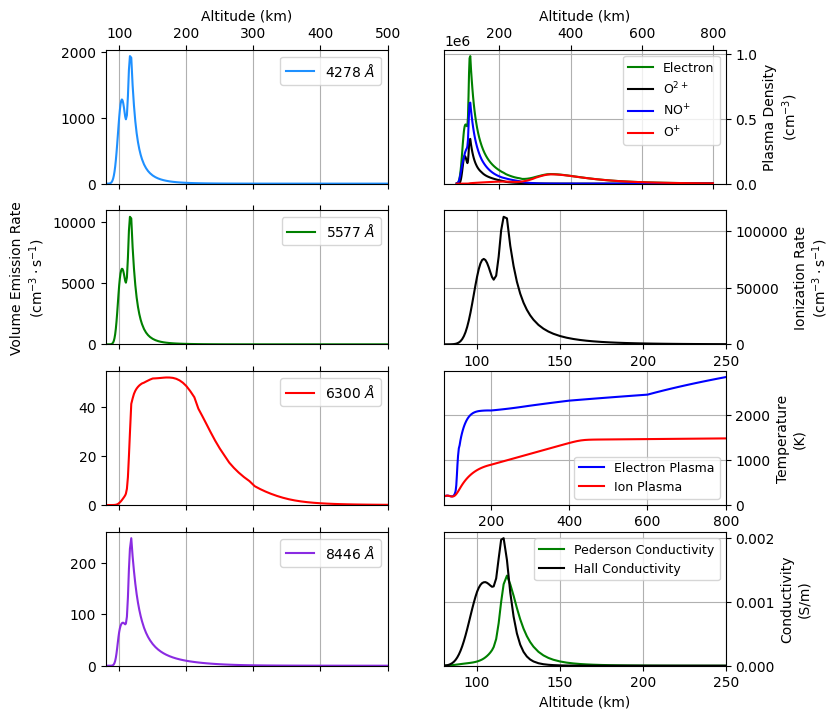

In [38]:
# print the energy flux, characteristic energy, and oxygen correction factor
print("Energy Flux:                %.03f erg/cm2/s" % (result.energy_flux))
print("Characteristic Energy:      %.03f eV" % (result.characteristic_energy))
print("Oxygen Correction Factor:   %.03f\n" % (result.oxygen_correction_factor))

# print all height-integrated Rayleighs data
print("""Height-integrated Rayleighs:
  427.8nm:  %.02f R
  557.7nm:  %.02f R
  630.0nm:  %.02f R
  844.6nm:  %.02f R""" % (result.height_integrated_rayleighs_4278,
                          result.height_integrated_rayleighs_5577,
                          result.height_integrated_rayleighs_6300,
                          result.height_integrated_rayleighs_8446))

# plot the emission, plasma, and neutral data
#
# we'll do this all in one plot, but made up from many subplots
alt = result.altitudes
fig = plt.figure(figsize=(8,8))

# plot all the emissions as a column of subplots
# 
# blueline emission
ax1 = fig.add_subplot(4,2,1)
ax1.plot(alt, result.emission_4278, label=r"4278 $\AA$", color="dodgerblue")
ax1.legend()
ax1.set_xlim(80,500)
ax1.set_ylim(bottom=0)
ax1.grid(axis="x")
ax1.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax1.xaxis.set_label_position("top")
ax1.set_xlabel("Altitude (km)")
ax1.xaxis.set_label_position("top")

# greenline emission
ax2 = fig.add_subplot(4,2,3)
ax2.plot(alt, result.emission_5577, label=r"5577 $\AA$", color="green")
ax2.legend()
ax2.set_xlim(80,500)
ax2.set_ylim(bottom=0)
ax2.grid(axis="x")
ax2.set_ylabel("Volume Emission Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax2.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# redline emission
ax3 = fig.add_subplot(4,2,5)
ax3.plot(alt, result.emission_6300, label=r"6300 $\AA$", color="red")
ax3.legend()
ax3.set_xlim(80,500)
ax3.set_ylim(bottom=0)
ax3.grid(axis="x")
ax3.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# near-infrared 8446 A emission
ax4 = fig.add_subplot(4,2,7)
ax4.plot(alt, result.emission_8446, label=r"8446 $\AA$", color="blueviolet")
ax4.legend()
ax4.set_xlim(80,500)
ax4.set_ylim(bottom=0)
ax4.grid(axis="x")
ax4.tick_params(axis="x", bottom=True, top=True, labelbottom=False)

# plot the plasma data as a second column of subplots
#
# plasma density
ax5 = fig.add_subplot(4,2,2)
ax5.plot(alt, result.plasma_electron_density, label="Electron", color="green")
ax5.plot(alt, result.plasma_o2plus_density, label="O$^{2+}$", color="black")
ax5.plot(alt, result.plasma_noplus_density, label="NO$^{+}$", color="blue")
ax5.plot(alt, result.plasma_oplus_density, label="O$^{+}$", color="red")
ax5.grid()
ax5.set_ylabel("Plasma Density\n(cm$^{-3}$)")
ax5.legend(fontsize=9)
ax7.set_xlim(80,700)
ax5.set_ylim(bottom=0)
ax5.tick_params(axis="x", bottom=True, top=True, labeltop=True, labelbottom=False)
ax5.set_xlabel("Altitude (km)")
ax5.xaxis.set_label_position("top")
ax5.yaxis.set_label_position("right")
ax5.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma ionisation rate
ax6 = fig.add_subplot(4,2,4)
ax6.plot(alt, result.plasma_ionisation_rate, color="black")
ax6.grid()
ax6.set_ylabel("Ionization Rate\n(cm$^{-3} \cdot $s$^{-1}$)")
ax6.set_xlim(80,250)
ax6.set_ylim(bottom=0)
ax6.yaxis.set_label_position("right")
ax6.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma temperatures
ax7 = fig.add_subplot(4,2,6)
ax7.plot(alt, result.plasma_electron_temperature, label="Electron Plasma", color="blue")
ax7.plot(alt, result.plasma_ion_temperature, label="Ion Plasma", color="red")
ax7.grid()
ax7.legend(fontsize=9)
ax7.set_ylabel("Temperature\n(K)")
ax7.set_xlim(80,800)
ax7.set_ylim(bottom=0)
ax7.yaxis.set_label_position("right")
ax7.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# plasma conductivities
ax8 = fig.add_subplot(4,2,8)
ax8.plot(alt, result.plasma_pederson_conductivity, label="Pederson Conductivity", color="green")
ax8.plot(alt, result.plasma_hall_conductivity, label="Hall Conductivity", color="black")
ax8.grid()
ax8.legend(fontsize=9)
ax8.set_ylabel("Conductivity\n(S/m)")
ax8.set_xlim(80,250)
ax8.set_ylim(bottom=0)
ax8.set_xlabel("Altitude (km)")
ax8.yaxis.set_label_position("right")
ax8.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=True)

# render the plot
plt.show()